#Actividad Guiada 2
Nombre: Victor Joel Pinargote <br>
Link: https://drive.google.com/file/d/11NjOoILip6vwjuJUHqDWRqrVMhHNIsnB/view?usp=sharing
<br>

GitHub: https://github.com/kmotillo/03MAIR_ALGORITMOS_OPTIMIZACION/blob/main/AG1/Algoritmos_AG2_Plantilla.ipynb


##Viaje por el rio
Este problema ya se trató en la AG1 con y sin grafos

##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A 
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]
        

##Primero abordaremos el problema con Fuerza Bruta y en una segunda seccion lo resolveremos con Ramificación y Poda

## a) resolucion por Fuerza Bruta:


In [ ]:
#Calculo del valor de una solucion parcial
# Función de coste
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR



valor((0, 1, 2, 3  ),COSTES)

73

In [ ]:
from itertools import permutations
import numpy as np

def fuerza_bruta(COSTES):
  fc = np.inf 
  mejorsolucion = ()
  for i in list(permutations(range(len(COSTES)),len(COSTES))):
    _fc = valor(i,COSTES)
    if _fc < fc :
      fc = _fc
      mejorsolucion = i 

  print('mejor solucion: ' , mejorsolucion , ' con valor:' , fc )


%time fuerza_bruta(COSTES)

mejor solucion:  (0, 3, 1, 2)  con valor: 61
CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 1.78 ms


## Este problema Tiene una complejidad O(n!), dado que n=4 el problema es abordable con algoritmos deterministas, pero ¿que pasría si las entradas del problema aumentan?.....

La complejidad aumentará de forma `factorial`, por lo que el presente problema no sería abordable para `n` mas grandes.

A continuación simularemos la fuerza bruta para `n` mas grandes:

In [ ]:
from random import randint
def matrix_gen(dim):
  COSTES = []
  for _ in range(dim):
    fila = []
    for _ in range(dim):
      fila.append(randint(10, 50)) # defino los beneficios entre 10 y 50 de forma aleatorea
    COSTES.append(fila)
  return COSTES

In [ ]:
matrix_5_dim = matrix_gen(5)
matrix_6_dim = matrix_gen(6)
matrix_7_dim = matrix_gen(7)
matrix_8_dim = matrix_gen(8)
matrix_10_dim = matrix_gen(10)

print("Fuerza Bruta con dimensionalidad 5")
%time fuerza_bruta(matrix_5_dim)
print("\nFuerza Bruta con dimensionalidad 6")
%time fuerza_bruta(matrix_6_dim)
print("\nFuerza Bruta con dimensionalidad 7")
%time fuerza_bruta(matrix_7_dim)
print("\nFuerza Bruta con dimensionalidad 8")
%time fuerza_bruta(matrix_8_dim)
print("\nFuerza Bruta con dimensionalidad 10")
%time fuerza_bruta(matrix_10_dim)

Fuerza Bruta con dimensionalidad 5
mejor solucion:  (1, 0, 4, 2, 3)  con valor: 95
CPU times: user 3.36 ms, sys: 73 µs, total: 3.43 ms
Wall time: 3.2 ms

Fuerza Bruta con dimensionalidad 6
mejor solucion:  (3, 1, 2, 4, 5, 0)  con valor: 120
CPU times: user 2.05 ms, sys: 6 µs, total: 2.06 ms
Wall time: 2.6 ms

Fuerza Bruta con dimensionalidad 7
mejor solucion:  (5, 3, 4, 0, 2, 1, 6)  con valor: 126
CPU times: user 8.19 ms, sys: 0 ns, total: 8.19 ms
Wall time: 8.51 ms

Fuerza Bruta con dimensionalidad 8
mejor solucion:  (7, 6, 4, 1, 0, 2, 3, 5)  con valor: 142
CPU times: user 157 ms, sys: 9.32 ms, total: 166 ms
Wall time: 168 ms

Fuerza Bruta con dimensionalidad 10
mejor solucion:  (8, 7, 3, 4, 6, 2, 5, 9, 1, 0)  con valor: 130
CPU times: user 6.87 s, sys: 412 ms, total: 7.28 s
Wall time: 7.39 s


Como conclusion tenemos que La complejidad del algoritmo por fuerza bruta viene dada por la función `itertools.permutations` que es O(n!). Lo que nos indica que este algoritmo dejara de funcionar con valores medianamente grandes, en el caso de Colab que asigna 12GB de RAM, el maximo numero de `n=10` maximo un `n=11` pero este ultimo en un tiempo poco razonable, es decir para cualquier `n>=12` se desvorda la RAM de COLAB

Como podemos observar la complejidad del problema aumenta según aumenta la dimensionalidad de sus entradas, esto se refleja en el tiempo de ejecución.

In [ ]:
matrix_11_dim = matrix_gen(11)
%time fuerza_bruta(matrix_11_dim)

mejor solucion:  (0, 4, 8, 1, 3, 6, 9, 10, 2, 5, 7)  con valor: 147
CPU times: user 1min 19s, sys: 3.56 s, total: 1min 23s
Wall time: 1min 24s


## b) resolucion por Ramificación y Poda:

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CS((0,1),COSTES)

74

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


%time ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4
CPU times: user 763 µs, sys: 0 ns, total: 763 µs
Wall time: 572 µs


Ahora probaremos el algoritmo de ramificación y poda para diminsionalidades mas grandes y compararemos los tiempos de ejecución, para lo cual se proponen las siguientes matrices de COSTOS, la mismas que se obtubieron despues de un proceso de prueba y error, obteniendo tiempos muy reducidos.

Esatas matrices reducen considerablemente el timpo del algoritmo de Ramificación y Poda debido que su distribución de costos o pesos se presta para que el algoritmo realice muchas podas y no tenga que evaluar todas las posibles soliciones.

In [ ]:
print("Ramificación y Poda con dimensionalidad 5")-
%time ramificacion_y_poda(matrix_8_dim)
print("\nRamificación y Poda con dimensionalidad 10")
%time ramificacion_y_poda(matrix_10_dim)

#matrix_12_dimension=matrix_gen(12)
matrix_12_dimension = [[48, 18, 23, 49, 44, 46, 50, 26, 40, 38, 18, 36], 
                       [34, 50, 47, 45, 36, 13, 31, 19, 42, 38, 37, 48], 
                       [16, 36, 11, 26, 42, 23, 41, 46, 13, 43, 19, 25], 
                       [20, 20, 46, 22, 32, 43, 29, 31, 15, 31, 18, 26], 
                       [32, 41, 44, 21, 30, 43, 43, 43, 35, 23, 27, 14], 
                       [32, 49, 10, 18, 40, 38, 22, 32, 23, 45, 15, 18], 
                       [41, 43, 43, 27, 20, 19, 48, 11, 19, 31, 40, 16], 
                       [15, 22, 50, 23, 38, 23, 50, 22, 15, 17, 41, 20], 
                       [32, 14, 37, 25, 26, 20, 46, 13, 34, 22, 29, 23], 
                       [44, 50, 23, 16, 33, 43, 39, 40, 31, 39, 39, 20], 
                       [44, 46, 13, 35, 37, 33, 41, 20, 34, 19, 19, 25], 
                       [28, 12, 37, 28, 26, 26, 31, 28, 24, 25, 22, 23]]
#matrix_14_dimension=matrix_gen(14)
matrix_14_dimension = [[48, 35, 16, 33, 44, 34, 37, 47, 41, 27, 22, 41, 47, 38], 
                       [39, 24, 32, 27, 30, 32, 11, 42, 41, 33, 47, 37, 46, 13], 
                       [38, 18, 20, 43, 40, 20, 33, 21, 25, 13, 34, 23, 18, 30], 
                       [18, 34, 30, 30, 28, 14, 30, 26, 46, 21, 27, 34, 22, 44], 
                       [27, 16, 50, 50, 34, 39, 32, 30, 21, 47, 41, 12, 22, 12], 
                       [15, 11, 23, 43, 38, 12, 13, 16, 30, 30, 26, 31, 28, 12], 
                       [34, 30, 32, 42, 28, 47, 38, 20, 14, 47, 24, 23, 46, 46], 
                       [28, 35, 19, 35, 19, 21, 19, 24, 14, 14, 31, 18, 10, 17], 
                       [16, 18, 12, 39, 33, 24, 14, 33, 34, 31, 10, 20, 19, 15], 
                       [12, 32, 30, 47, 27, 41, 13, 25, 48, 22, 46, 20, 34, 21], 
                       [30, 44, 17, 22, 16, 48, 21, 11, 12, 34, 31, 14, 20, 12], 
                       [11, 33, 31, 43, 20, 23, 38, 43, 18, 29, 19, 13, 25, 11], 
                       [25, 28, 36, 19, 45, 43, 22, 19, 38, 43, 50, 13, 23, 30], 
                       [28, 24, 34, 39, 10, 30, 20, 50, 39, 12, 25, 41, 28, 16]]

#matrix_16_dimension=matrix_gen(16)
matrix_16_dimension = [[21, 27, 31, 43, 12, 25, 46, 20, 21, 18, 12, 22, 27, 47, 41, 25], 
                       [24, 29, 34, 24, 40, 17, 33, 46, 23, 33, 40, 35, 47, 43, 38, 26], 
                       [32, 37, 32, 34, 50, 17, 50, 17, 46, 44, 38, 46, 38, 43, 24, 32], 
                       [11, 33, 11, 41, 34, 49, 11, 21, 19, 10, 26, 48, 30, 25, 10, 23], 
                       [28, 22, 39, 44, 32, 19, 32, 48, 24, 36, 39, 19, 49, 23, 10, 15], 
                       [17, 10, 30, 41, 37, 11, 15, 27, 32, 37, 26, 33, 39, 18, 10, 28], 
                       [12, 16, 19, 22, 38, 39, 26, 18, 43, 25, 37, 12, 33, 28, 26, 38], 
                       [21, 48, 48, 30, 21, 29, 46, 40, 49, 42, 38, 14, 33, 31, 10, 10], 
                       [39, 11, 22, 27, 27, 45, 36, 32, 22, 49, 27, 15, 43, 37, 15, 41], 
                       [44, 15, 18, 28, 12, 18, 29, 36, 16, 40, 28, 28, 22, 17, 32, 15], 
                       [46, 14, 45, 25, 16, 50, 27, 49, 43, 48, 27, 50, 45, 35, 50, 48], 
                       [49, 47, 12, 37, 22, 38, 39, 29, 32, 42, 19, 39, 42, 43, 21, 30], 
                       [34, 21, 34, 35, 12, 33, 35, 19, 32, 49, 19, 10, 28, 23, 35, 36], 
                       [41, 45, 35, 48, 26, 26, 21, 26, 17, 41, 20, 46, 45, 11, 16, 12], 
                       [24, 48, 14, 23, 37, 33, 33, 41, 44, 31, 30, 24, 25, 35, 39, 23], 
                       [29, 46, 32, 40, 48, 14, 37, 42, 31, 42, 18, 25, 30, 35, 29, 10]]

print("\nAhora lo mas gordo Ramificación y Poda con dimensionalidad >= 12")

print("\nRamificación y Poda con dimensionalidad 12")
%time ramificacion_y_poda(matrix_12_dimension)
print("\nRamificación y Poda con dimensionalidad 14")
%time ramificacion_y_poda(matrix_14_dimension)
print("\nRamificación y Poda con dimensionalidad 16")
%time ramificacion_y_poda(matrix_16_dimension)



Ramificación y Poda con dimensionalidad 5
La solucion final es: [{'s': (2, 0, 1, 4, 3), 'ci': 104}]  en  51  iteraciones  para dimension:  5
CPU times: user 1.12 ms, sys: 11 µs, total: 1.13 ms
Wall time: 984 µs

Ramificación y Poda con dimensionalidad 6
La solucion final es: [{'s': (5, 1, 2, 0, 4, 3), 'ci': 103}]  en  104  iteraciones  para dimension:  6
CPU times: user 6.78 ms, sys: 50 µs, total: 6.83 ms
Wall time: 5.93 ms

Ramificación y Poda con dimensionalidad 7
La solucion final es: [{'s': (1, 4, 0, 3, 5, 6, 2), 'ci': 103}]  en  934  iteraciones  para dimension:  7
CPU times: user 97.9 ms, sys: 185 µs, total: 98.1 ms
Wall time: 96.4 ms

Ramificación y Poda con dimensionalidad 8
La solucion final es: [{'s': (5, 2, 7, 6, 0, 4, 3, 1), 'ci': 129}]  en  319  iteraciones  para dimension:  8
CPU times: user 25.3 ms, sys: 32 µs, total: 25.3 ms
Wall time: 24.8 ms

Ramificación y Poda con dimensionalidad 10
La solucion final es: [{'s': (5, 7, 1, 3, 2, 8, 0, 4, 6, 9), 'ci': 149}]  en  6098  

El algoritmo de Ramificación y Poda comienza a dar tiempos altos a partir de la dimesion 14 esto dependerá de la dimension de problema y tambien de la capacidad del algoritmo al realizar podas, esto ligado a la distribucion de los costos en las tareas, podemos ver como con una dimensionalidad de 16 obtenemos un tiempo menor a una de 14, esto es una casualidad, no pasa siempre, pero se explica debido a que la complejidad es O(n!), debemos recordar que `O` es el peor de los caso, por tal motivo no siempre un problema de mayor dimensionalidad que otro tiene que resultar ser mas complejo.

Por el contrario del algoritmo fuerza bruta, que para valores mayores a 10 consumía todos los recursos del Colab y siempre a mayor dimensionalidad, siempre existirá una mayor complejidad.



##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

$$f(x) =  x² + y²$$

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2+X[1]**2      #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

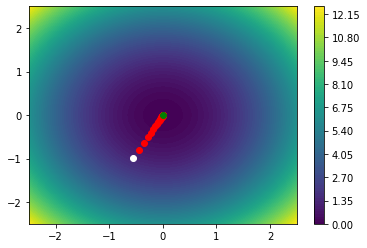

Solucion: [-1.961792360535452e-49, -3.480879338491428e-49] 1.5965150234991782e-97


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=.1 

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


# Mejora de la Grafica en una funcón

In [ ]:
def graficarGradiente_funcion(f, df = None):
  if df == None:
    df = lambda X: [2*X[0], 2*X[1]] #Gradiente

  #prepara los datos para dibujar mapa de niveles de Z
  resolucion = 100
  rango = 2.5
  X = np.linspace(-rango, rango, resolucion)
  Y = np.linspace(-rango, rango, resolucion)
  Z = np.zeros((resolucion, resolucion))
  for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
      Z[iy, ix] = f([x,y])

  #pinta el mapa de niveles de z
  plt.contourf(X,Y,Z, resolucion)
  plt.colorbar()

  #generamos punto aleatorio
  P=[random.uniform(-2,2), random.uniform(-2,2)]
  plt.plot(P[0], P[1], "o", c="white")

  #tasa de aprendizaje
  TA = 0.1

  #iteraciones
  for _ in range(500):
    grad = df(P)
    #print(P.grad)
    P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
    plt.plot(P[0],P[1], "o",c="red")

  plt.plot(P[0], P[1],"o",c="green")  
  plt.show()
  print("Solucion:", P, f(P))
  return

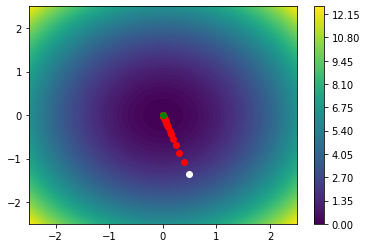

Solucion: [1.6933177296543662e-49, -4.755691489068612e-49] 2.548392647276145e-97


In [ ]:
f = lambda X: X[0]**2 + X[1]**2 #Funcion
punto = graficarGradiente_funcion(f)